## Ejercicios API Frankfurter

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

import requests

from pprint import pprint

### Ejercicio 1:

- Definir una función que tome como parámetro un año y una moneda diferente del euro y que muestre la relación entre el euro y la otra moneda en ese año. En la gráfica se debe marcar el máximo y el mínimo. Imprime los endpoints que utilizados para extraer la información.

In [2]:
def rate(fecha, currency):

    url = "https://api.frankfurter.app"
        
    date_1 = fecha
    año = fecha.split("-")[0]
    date_2 = f"{año}-12-31"
    
    endpoint = f"{url}/{date_1}..{date_2}?to={currency}"

    print(f"Endpoint: {endpoint}")

    response = requests.get(endpoint)
    json = response.json()
    
    valores=[]
    fechas =[]

    for x in json["rates"].keys():#iteramos sobre las keys y obtenemos los valores
        fechas.append(x)  
        valores.append(response.json()["rates"][x][currency])
        
    return (fechas, valores, currency)

In [3]:
data = rate("2015-05-06", "CAD")

Endpoint: https://api.frankfurter.app/2015-05-06..2015-12-31?to=CAD


In [4]:
fechas = [datetime.strptime(fecha, "%Y-%m-%d") for fecha in data[0]]
valores = data[1]
currency = data[2]

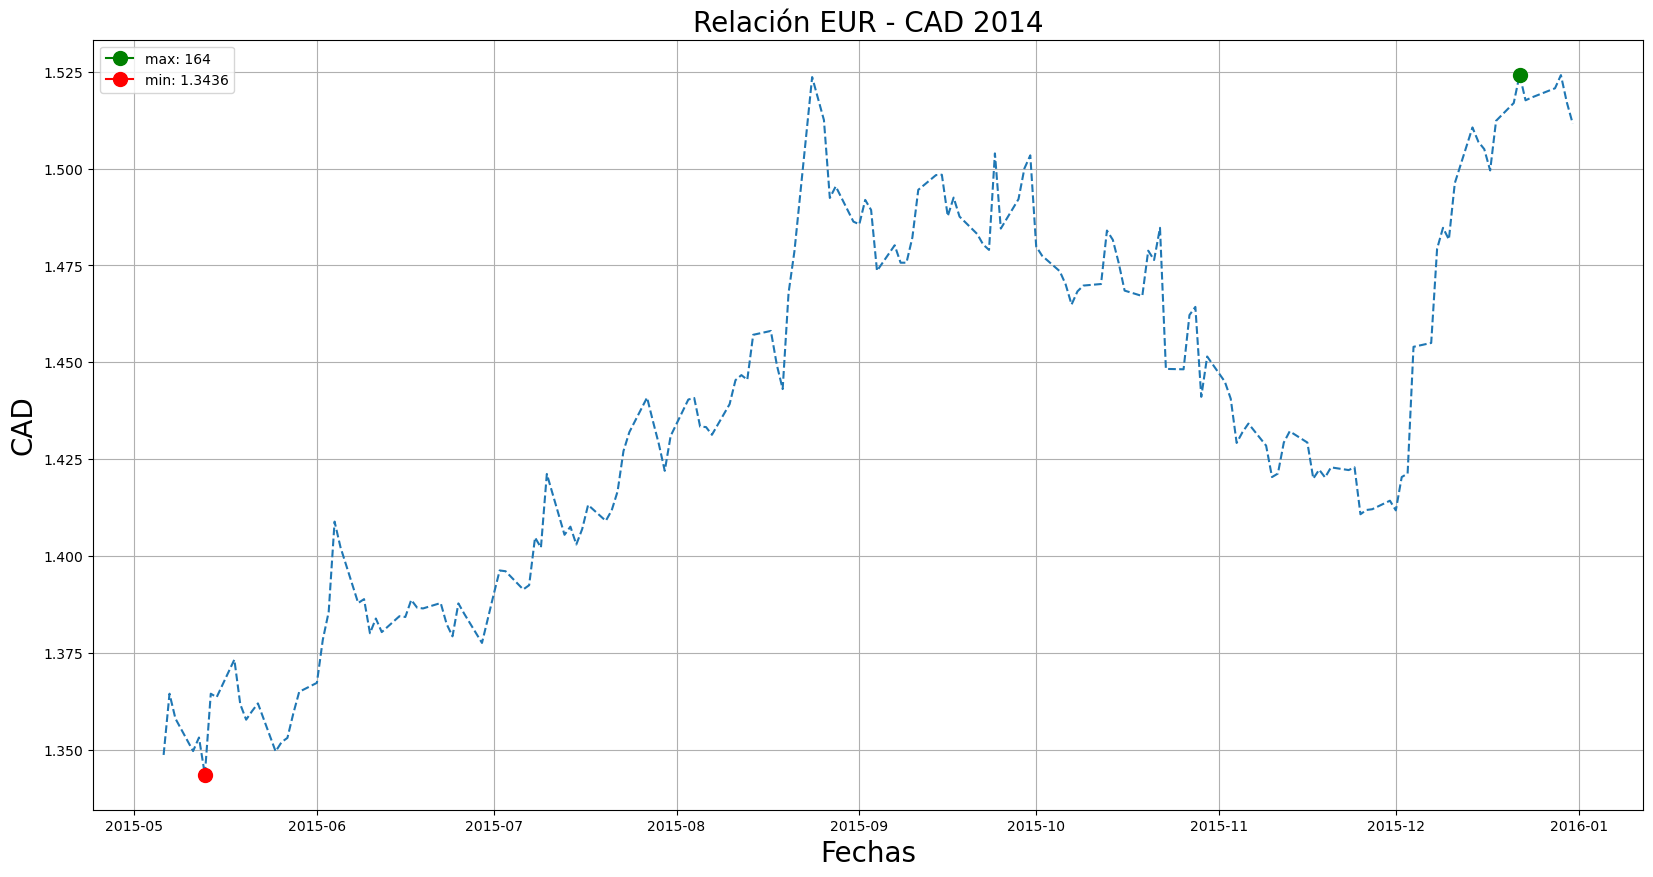

In [5]:
plt.figure(figsize = (20, 10))

valores # aqui estan los valores
fechas #estan son las fechas
# Plot (función especial que trabaja con fechas)
plt.plot_date(x = fechas, y = valores, fmt = "--")



# max
plt.plot(fechas[np.argmax(valores)],
         np.max(valores),
         color      = "green",
         marker     = "o",
         markersize = 10,
         label      = f"max: { np.argmax(valores)}")

# min
plt.plot(fechas[np.argmin(valores)],
         np.min(valores),
         color      = "red",
         marker     = "o",
         markersize = 10,
         label      = f"min: {np.min(valores)}")

# Evita que se sobrepongan las fechas
#plt.gcf().autofmt_xdate()
plt.xticks(rotation='horizontal')

# Etiquetas
plt.legend()
plt.xlabel("Fechas", fontsize = 20)
plt.ylabel(currency, fontsize = 20)
plt.title(f"Relación EUR - {currency} 2014", fontsize = 20)

plt.grid()
plt.show()

### Ejercicio 2:

- Repite el ejercicio 1 pero esta vez agregando al mismo plot tantas monedas como el usuario lo indique. Esta vez no hace falta indicar los máximos y mínimos de cada moneda.

In [6]:
moneda=""
lista_monedas=[]
while moneda != "FIN":
    moneda=input("ingrese el tipo de moneda(para terminar escriba FIN): ").upper()
    
    lista_monedas.append(moneda)
lista_monedas.pop()
    


    



ingrese el tipo de moneda(para terminar escriba FIN): chf
ingrese el tipo de moneda(para terminar escriba FIN): usd
ingrese el tipo de moneda(para terminar escriba FIN): fin


'FIN'

In [7]:
lista_monedas

['CHF', 'USD']

Endpoint: https://api.frankfurter.app/2018-03-06..2018-12-31?to=CHF
Endpoint: https://api.frankfurter.app/2018-03-06..2018-12-31?to=USD


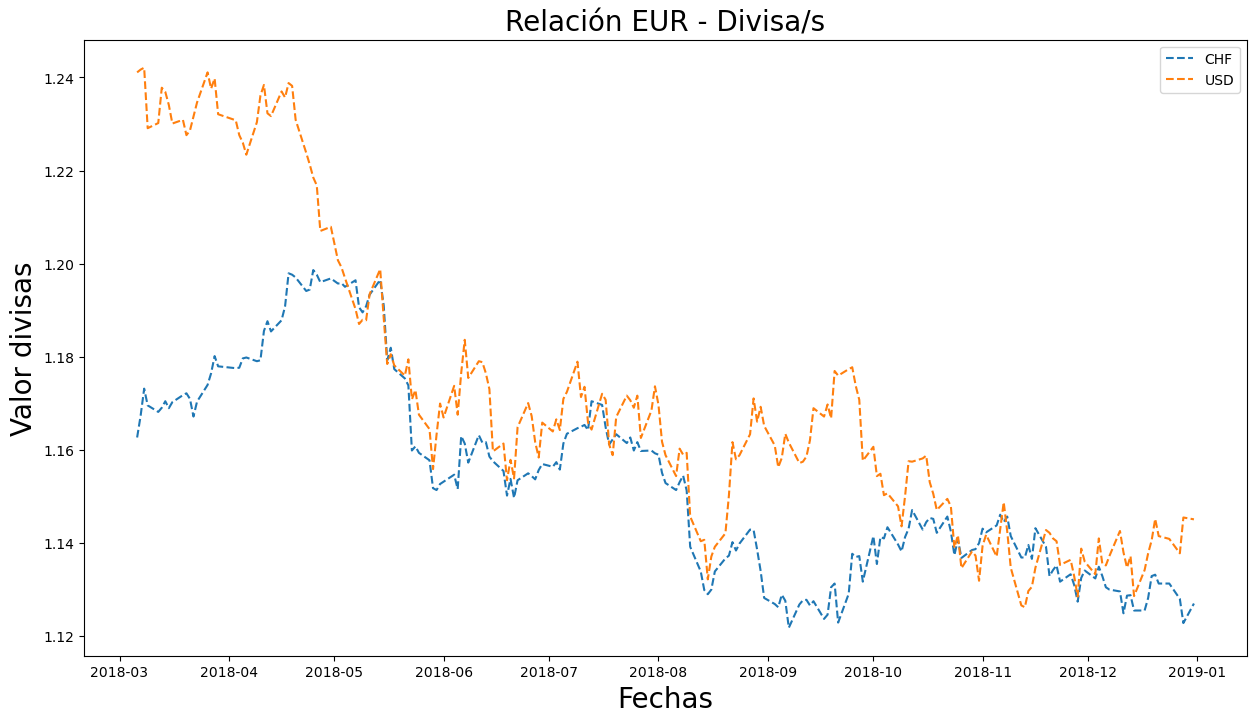

In [8]:
plt.figure(figsize = (15, 8))

for currency in lista_monedas:
    data2 = rate("2018-03-06", currency)
    fechas2 = [datetime.strptime(fecha, "%Y-%m-%d") for fecha in data2[0]]
    valores2 = data2[1]
    currency2 = data2[2]
    plt.plot_date(x = fechas2, y = valores2, label = currency2, fmt = "--")

plt.legend()
plt.xlabel("Fechas", fontsize = 20)
plt.ylabel("Valor divisas", fontsize = 20)
plt.title(f"Relación EUR - Divisa/s", fontsize = 20)
    
plt.show()

### Ejercicio 3:

- Repite el ejercicio 1 esta vez evaluando la relación de dos monedas que no sean el euro. Muestra el máximo y el mínimo de la relación entre las monedas.

In [9]:
def rate2(fecha, currency1, currency2):
    url = "https://api.frankfurter.app"
        
    date_ini = fecha
    año = fecha.split("-")[0]
    date_fin = f"{año}-12-31"
    
    endpoint = f"{url}/{date_ini}..{date_fin}?from={currency1}&to={currency2}"

    print(f"Endpoint: {endpoint}")

    response = requests.get(endpoint)
    json = response.json()
    
    valores = []
    fechas = []

    for x in json["rates"].keys():
        fechas.append(x)  
        valores.append(json["rates"][x][currency2])
    
    
    return (fechas, valores, currency1, currency2)

In [10]:
data = rate2("2017-05-06", "PHP", "MXN")

Endpoint: https://api.frankfurter.app/2017-05-06..2017-12-31?from=PHP&to=MXN


In [11]:
fechas2 = [datetime.strptime(fecha, "%Y-%m-%d") for fecha in data[0]]
valores2 = data[1]
currency1 = data[2]
currency2 = data[3]

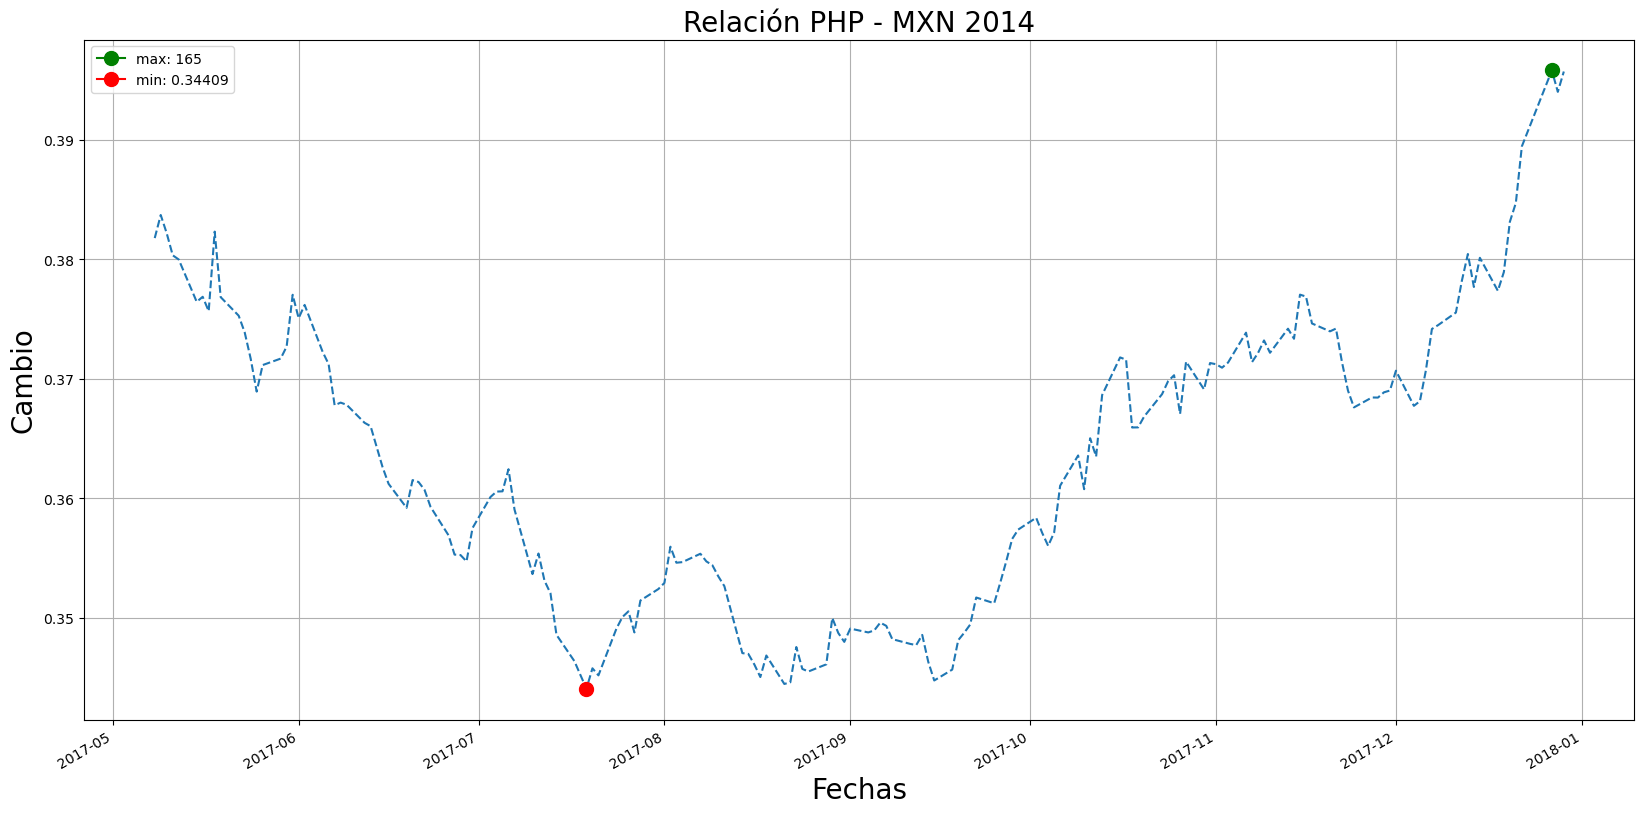

In [12]:
plt.figure(figsize = (20, 10))

valores # aqui estan los valores
fechas #estan son las fechas
# Plot (función especial que trabaja con fechas)
plt.plot_date(x = fechas2, y = valores2, fmt = "--")



# max
plt.plot(fechas2[np.argmax(valores2)],
         np.max(valores2),
         color      = "green",
         marker     = "o",
         markersize = 10,
         label      = f"max: { np.argmax(valores2)}")

# min
plt.plot(fechas2[np.argmin(valores2)],
         np.min(valores2),
         color      = "red",
         marker     = "o",
         markersize = 10,
         label      = f"min: {np.min(valores2)}")

# Evita que se sobrepongan las fechas
plt.gcf().autofmt_xdate()
#plt.xticks(rotation='horizontal')

# Etiquetas
plt.legend()
plt.xlabel("Fechas", fontsize = 20)
plt.ylabel("Cambio", fontsize = 20)
plt.title(f"Relación {currency1} - {currency2} 2014", fontsize = 20)

plt.grid()
plt.show()